<a href="https://colab.research.google.com/github/karen-nelson/EDA_car_features/blob/master/EDA_of_car_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THE PROJECT**

The objective of the project is to do data pre-processing and EDA. What we want to do is create a model of car prices. The data comes from the Kaggle dataset "Car Features and MSRP". The dataset is the data of prices of cars that have been sold in the USA between 1990 and 2017, and their associated features.
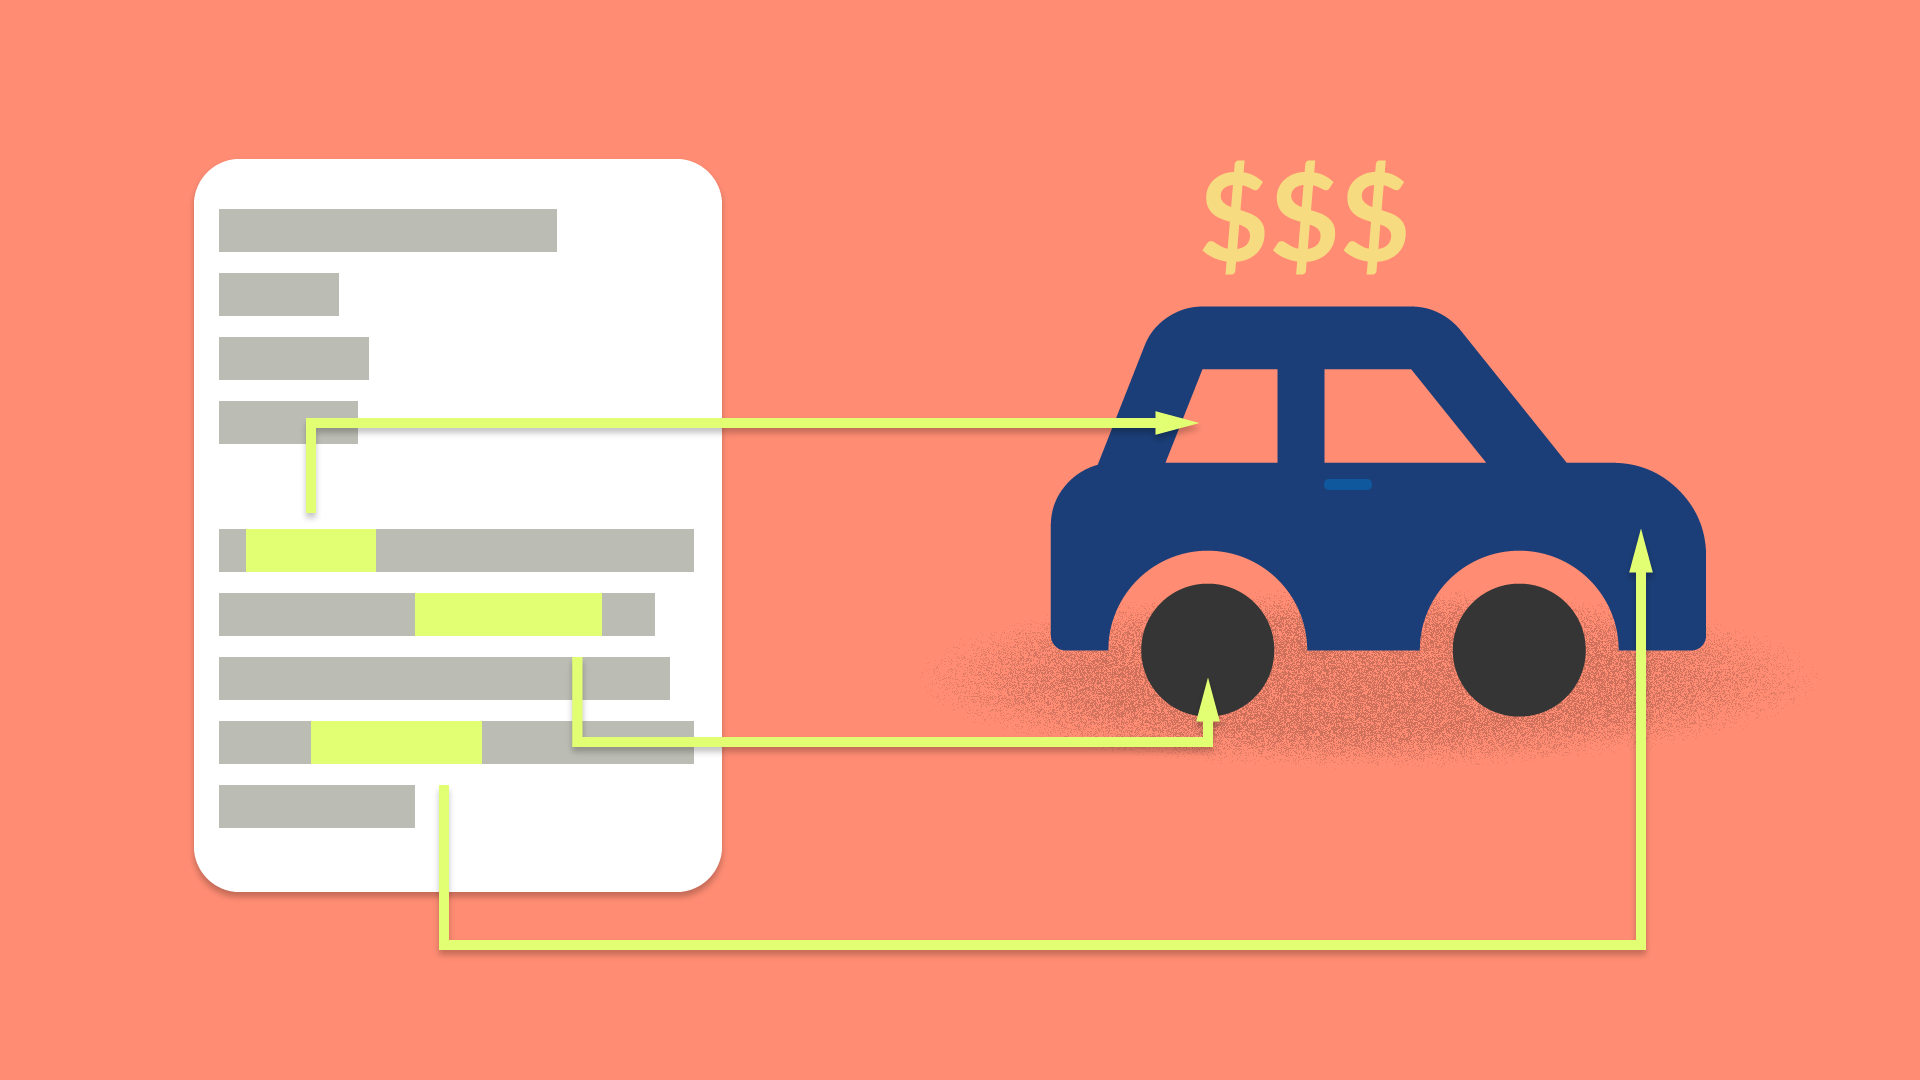

**EXPLORATORY DATA ANALYSIS WITH PYTHON**

EDA allows us to visualise the data to understand it as well as to create hypotheses for further analysis. It includes summarising data, statistical analysis and visualising of data. Python provides expert tools for exploratory analysis with *pandas* for summarising, *scipy* for statistical analysis and *matplotlib* and *pyplot* for visualisation.

**INTRODUCTION**

The most important factors in predicting the price of a car are the age of the car, its make (and model), its mileage (the number of kilometers it has run) and its horsepower.  Due to  rising fuel  prices, fuel  economy (measured in miles per gallon) is  also of  prime  importance. Other factors such as the volume of its cylinders (measured in  cc), number of doors, its physical state, whether it is automatic or manual transmission may influence the price as well.

In this project, we investigate the application of supervised  machine learning techniques to predict the price based on different features of the car. Different techniques like linear regression analysis, and decision trees have been used to make the  predictions. 

# 1.1. Importing the dataset and the necessary libraries 

In [ ]:
import numpy as np                  #multi-dimensional array implementation
import pandas as pd                 #data processing
import seaborn as sns               #high-level interface for statistical graphics
import matplotlib.pyplot as plt     #data visualisation

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The read_csv function loads the entire data file to a Python environment as a Pandas dataframe and default delimiter is ‘,’ for a csv file.

In [ ]:
data=pd.read_csv('data.csv')

# 1.2. Checking datatype, statistical summary, shape, null values etc.

One of the most elementary steps is getting a basic description of your data. Our next step is understanding what the columns actually contain with respect to the range of values.

In [ ]:
# Previewing the first 5 rows 

data.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
# Previewing the last 5 rows

data.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [ ]:
# Checking datatypes of the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
# Checking statistical summary 

data.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [ ]:
# Checking shape of the dataframe

data.shape

(11914, 16)

In [ ]:
# Checking null values in the dataframe

data.isna().any()

Make                 False
Model                False
Year                 False
Engine Fuel Type      True
Engine HP             True
Engine Cylinders      True
Transmission Type    False
Driven_Wheels        False
Number of Doors       True
Market Category       True
Vehicle Size         False
Vehicle Style        False
highway MPG          False
city mpg             False
Popularity           False
MSRP                 False
dtype: bool

# 2. Dropping columns

Data cleansing is the process of detecting and correcting corrupt records from a dataset. It refers to identifying incomplete, inaccurate or irrelevant parts of the data and then replacing, modifying or deleting the coarse data.




There are several important factors that contribute to the prediction of the model. However, information about all these factors are not always available. Hence, columns (**'Market Category'**) containing several null values are dropped. 

In [ ]:
data.drop(['Market Category'], axis=1, inplace=True)

# 3. Renaming columns

It is necessary to eliminate redundancy without loss of essential information for easier readability.





In [ ]:
# Renaming the columns

data.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"},inplace=True)

# 4. Rectifying duplicate and missing data

Missing values are common occurrences in data. Unfortunately, most predictive modeling techniques cannot handle any missing values. Therefore, this problem must be addressed prior to modeling because the data set can lose expressiveness, which can lead to weak or biased analyses.


In [ ]:
# Checking for any duplicate values

duplicate_data = data[data.duplicated()]
print(duplicate_data)

         Make     Model  Year  ... MPG-C  Popularity  Price
14        BMW  1 Series  2013  ...    19        3916  31500
18       Audi       100  1992  ...    17        3105   2000
20       Audi       100  1992  ...    17        3105   2000
24       Audi       100  1993  ...    17        3105   2000
25       Audi       100  1993  ...    17        3105   2000
...       ...       ...   ...  ...   ...         ...    ...
11481  Suzuki      X-90  1998  ...    22         481   2000
11603   Volvo      XC60  2017  ...    20         870  46350
11604   Volvo      XC60  2017  ...    23         870  40950
11708  Suzuki       XL7  2008  ...    15         481  29149
11717  Suzuki       XL7  2008  ...    16         481  27499

[720 rows x 15 columns]


In [ ]:
# Removing the duplicate rows

data.drop_duplicates(inplace=True)

In [ ]:
# Checking for null values 

data.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64


Although imputation of data can prevent data loss, complete removal of data with missing values results in robust and highly accurate model when there are enough samples in the data set.

In [ ]:
# Dropping the rows containing null values

data.dropna(inplace=True)

Some of the data in the 'Transmission' column are labelled as UNKNOWN. Hence, they need to be removed as well.

In [ ]:
data.drop(data[data['Transmission'] == 'UNKNOWN'].index, inplace = True)

# 5. Detecting and removing outliers

The data might contain values that diverge heavily from the big majority of the other data. They could be real outliers or mistakes. They are identified by means of box plots or scatter plots.



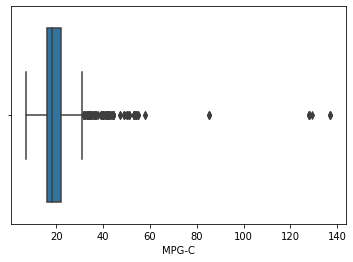

In [ ]:
sns.boxplot(x=data['MPG-C'])

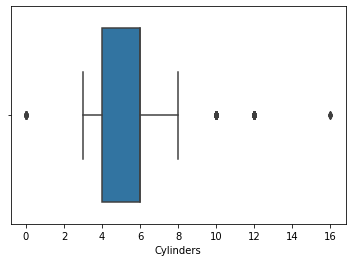

In [ ]:
sns.boxplot(x=data['Cylinders'])

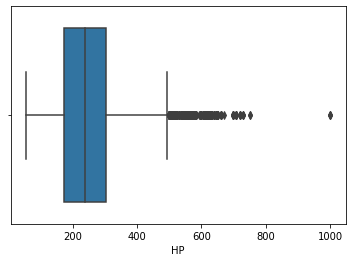

In [ ]:
sns.boxplot(x=data['HP'])

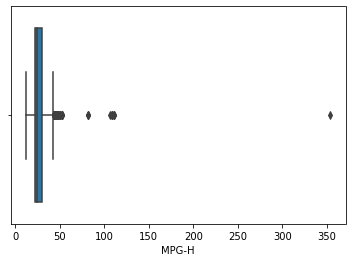

In [ ]:
sns.boxplot(x=data['MPG-H'])

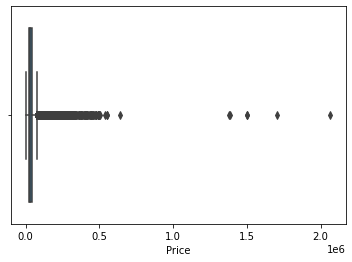

In [ ]:
sns.boxplot(x=data['Price'])

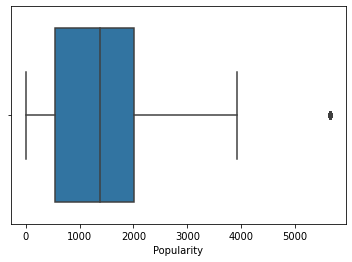

In [ ]:
sns.boxplot(x=data['Popularity'])

Lines extending vertically from the boxes (whiskers) indicate variability outside the upper and lower quartiles.

Box plot uses the IQR method to display data and outliers but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year                   9.0
HP                   131.0
Cylinders              2.0
Number of Doors        2.0
MPG-H                  8.0
MPG-C                  6.0
Popularity          1460.0
Price              21452.5
dtype: float64


In [ ]:
data=data[~((data < (Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)]
data.shape

(8600, 15)

# 6.1. Finding top 10 car brands 

<function matplotlib.pyplot.show>

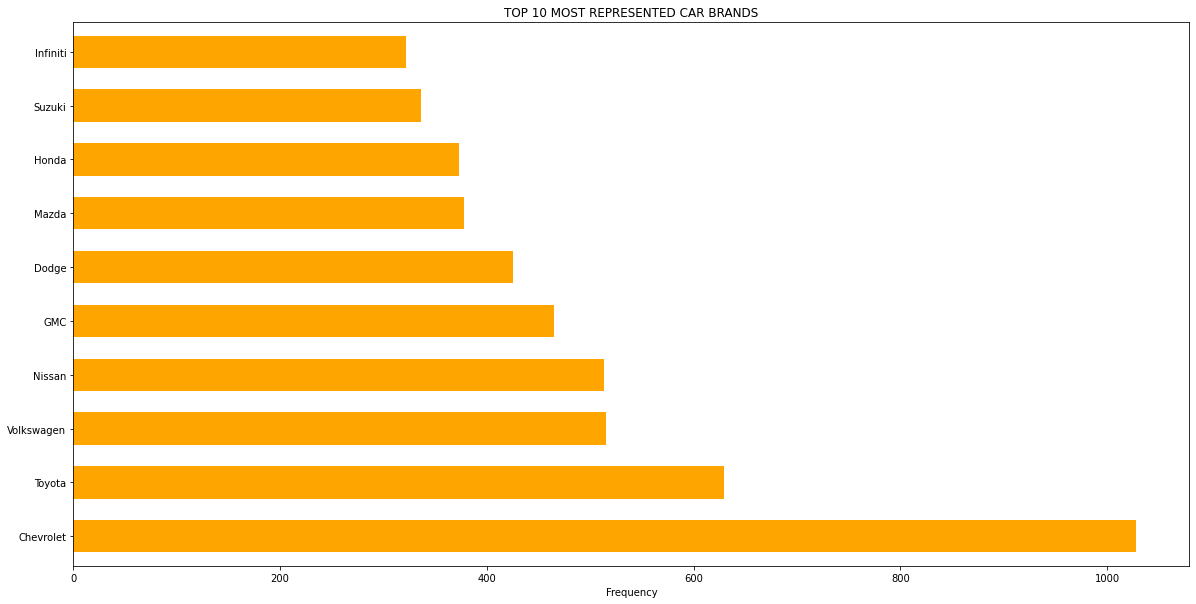

In [ ]:
#Plotting the most represented car brands in the dataset

freq=data['Make'].value_counts().head(10)
freq.plot(kind='barh',color='orange',width=0.6,figsize=(20,10))
plt.xlabel('Frequency')
plt.title('TOP 10 MOST REPRESENTED CAR BRANDS')
plt.show

# 6.2. Displaying average price of each top car brand

In [ ]:
data.groupby(['Make']).agg({'Price':['mean','count']}).sort_values(('Price','count'), ascending=False)[:10]

Price      
                    mean count
Make                          
Chevrolet   28188.626459  1028
Toyota      29011.750397   629
Volkswagen  29032.817476   515
Nissan      28352.543860   513
GMC         33527.124731   465
Dodge       26076.722353   425
Mazda       20495.820106   378
Honda       27381.364611   373
Suzuki      18164.098214   336
Infiniti    43127.822981   322

# 7. Plotting the correlation matrix

Correlation is a statistical technique that shows pairwise correlation of all columns in the dataframe. The stronger the color, the larger the correlation magnitude.






It has a value between -1 and 1 where:


*   -1 indicates a perfectly negative linear correlation between two 
variables
*   0 indicates no linear correlation between two variables
*   1 indicates a perfectly positive linear correlation between two variables







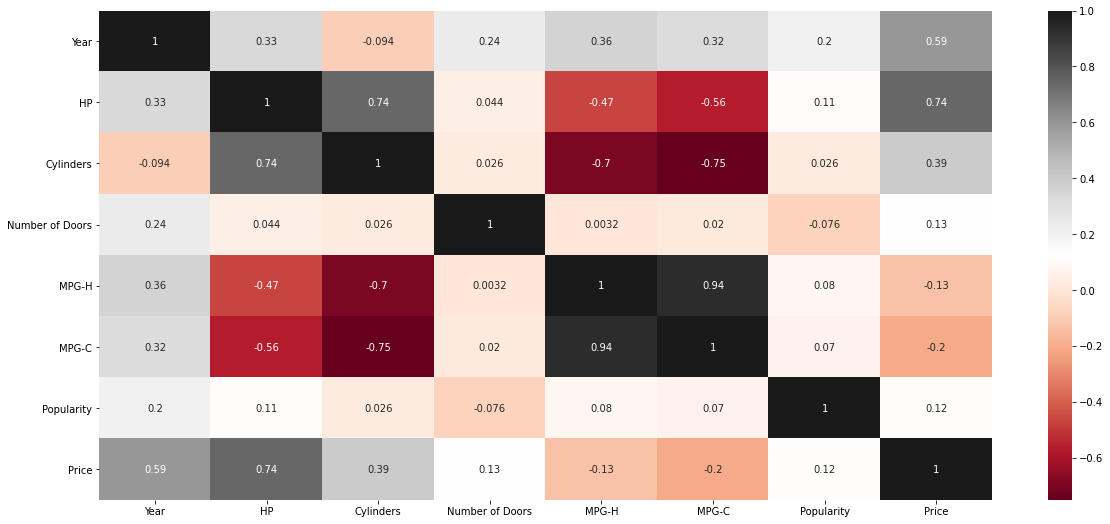

In [ ]:
corr=data.corr()
plt.figure(figsize=(20,9))
sns.heatmap(corr, annot=True, cmap='RdGy')
plt.show()

Positive correlations are displayed in black and negative correlations in red. 

The correlation coefficients along the diagonal of the table are all equal to 1 because each variable is perfectly correlated with itself.

It can be concluded from the matrix that,

A strong positive linear relationship exists between:
*   MPG-H - MPG-C
*   Cylinders - HP
*   HP - Price

A moderate positive linear relationship exists between:
*    Year - Price

A weak positive linear relationship exists between:
*   HP - Year
*   MPG-H - Year
*   MPG-C - Year
*   Cylinders - Price

A strong negative linear relationship exists between:
*   Cylinders - MPG-H
*   Cylinders - MPG-C

A moderate negative linear relationship exists between:
*   MPG-C - HP
*   MPG-H - HP

 

# 8. Performing EDA and plotting graphs

EDA performs to define and refine our important features and variable selection that will be used in our model.

In [ ]:
# sample() function is used to get a random sample of items from an axis of object

data.sample(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
10309,Scion,tC,2014,regular unleaded,179.0,4.0,AUTOMATIC,front wheel drive,2.0,Compact,2dr Hatchback,31,23,105,20210
9185,Suzuki,Sidekick,1997,regular unleaded,95.0,4.0,MANUAL,four wheel drive,4.0,Compact,4dr SUV,24,21,481,2000
1744,Mazda,B-Series,2001,regular unleaded,207.0,6.0,MANUAL,four wheel drive,4.0,Compact,Extended Cab Pickup,18,14,586,22085
3635,Dodge,Durango,2017,regular unleaded,295.0,6.0,AUTOMATIC,all wheel drive,4.0,Large,4dr SUV,25,18,1851,43995
3322,Oldsmobile,Cutlass Ciera,1994,regular unleaded,120.0,4.0,AUTOMATIC,front wheel drive,4.0,Midsize,Sedan,28,22,26,2000


In [ ]:
# nunique() function is used to count distinct observations over requested axis

data.nunique()

Make                  37
Model                646
Year                  24
Engine Fuel Type       8
HP                   243
Cylinders              5
Transmission           3
Drive Mode             4
Number of Doors        3
Vehicle Size           3
Vehicle Style         16
MPG-H                 30
MPG-C                 22
Popularity            37
Price               4766
dtype: int64

Plotting various features against *price* could provide insight into how they are related with each other. 

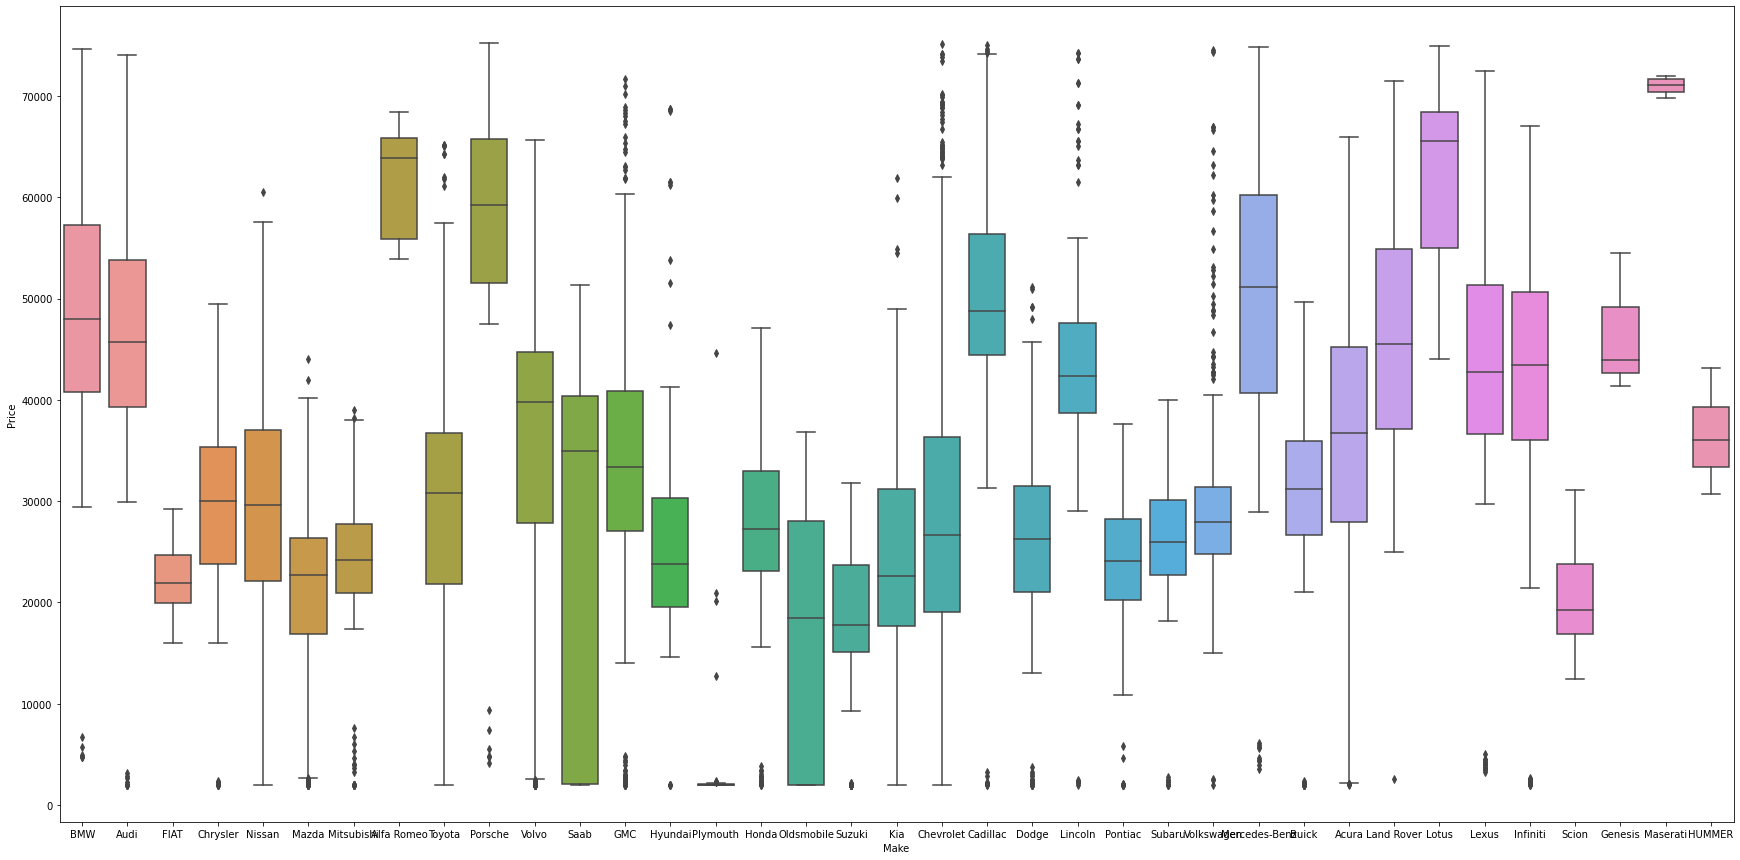

In [ ]:
plt.figure(figsize = (30,15))
sns.boxplot(x = data['Make'], y = data['Price'])

From the above price boxplot, it is clear that the brands with the most expensive vehicles in the dataset belong to Maserati, Lotus and Romeo. The manufacturers who make luxury segment vehicles continue to be on the upper class and the manufacturers who make mid segment do not venture into the luxury segment. 

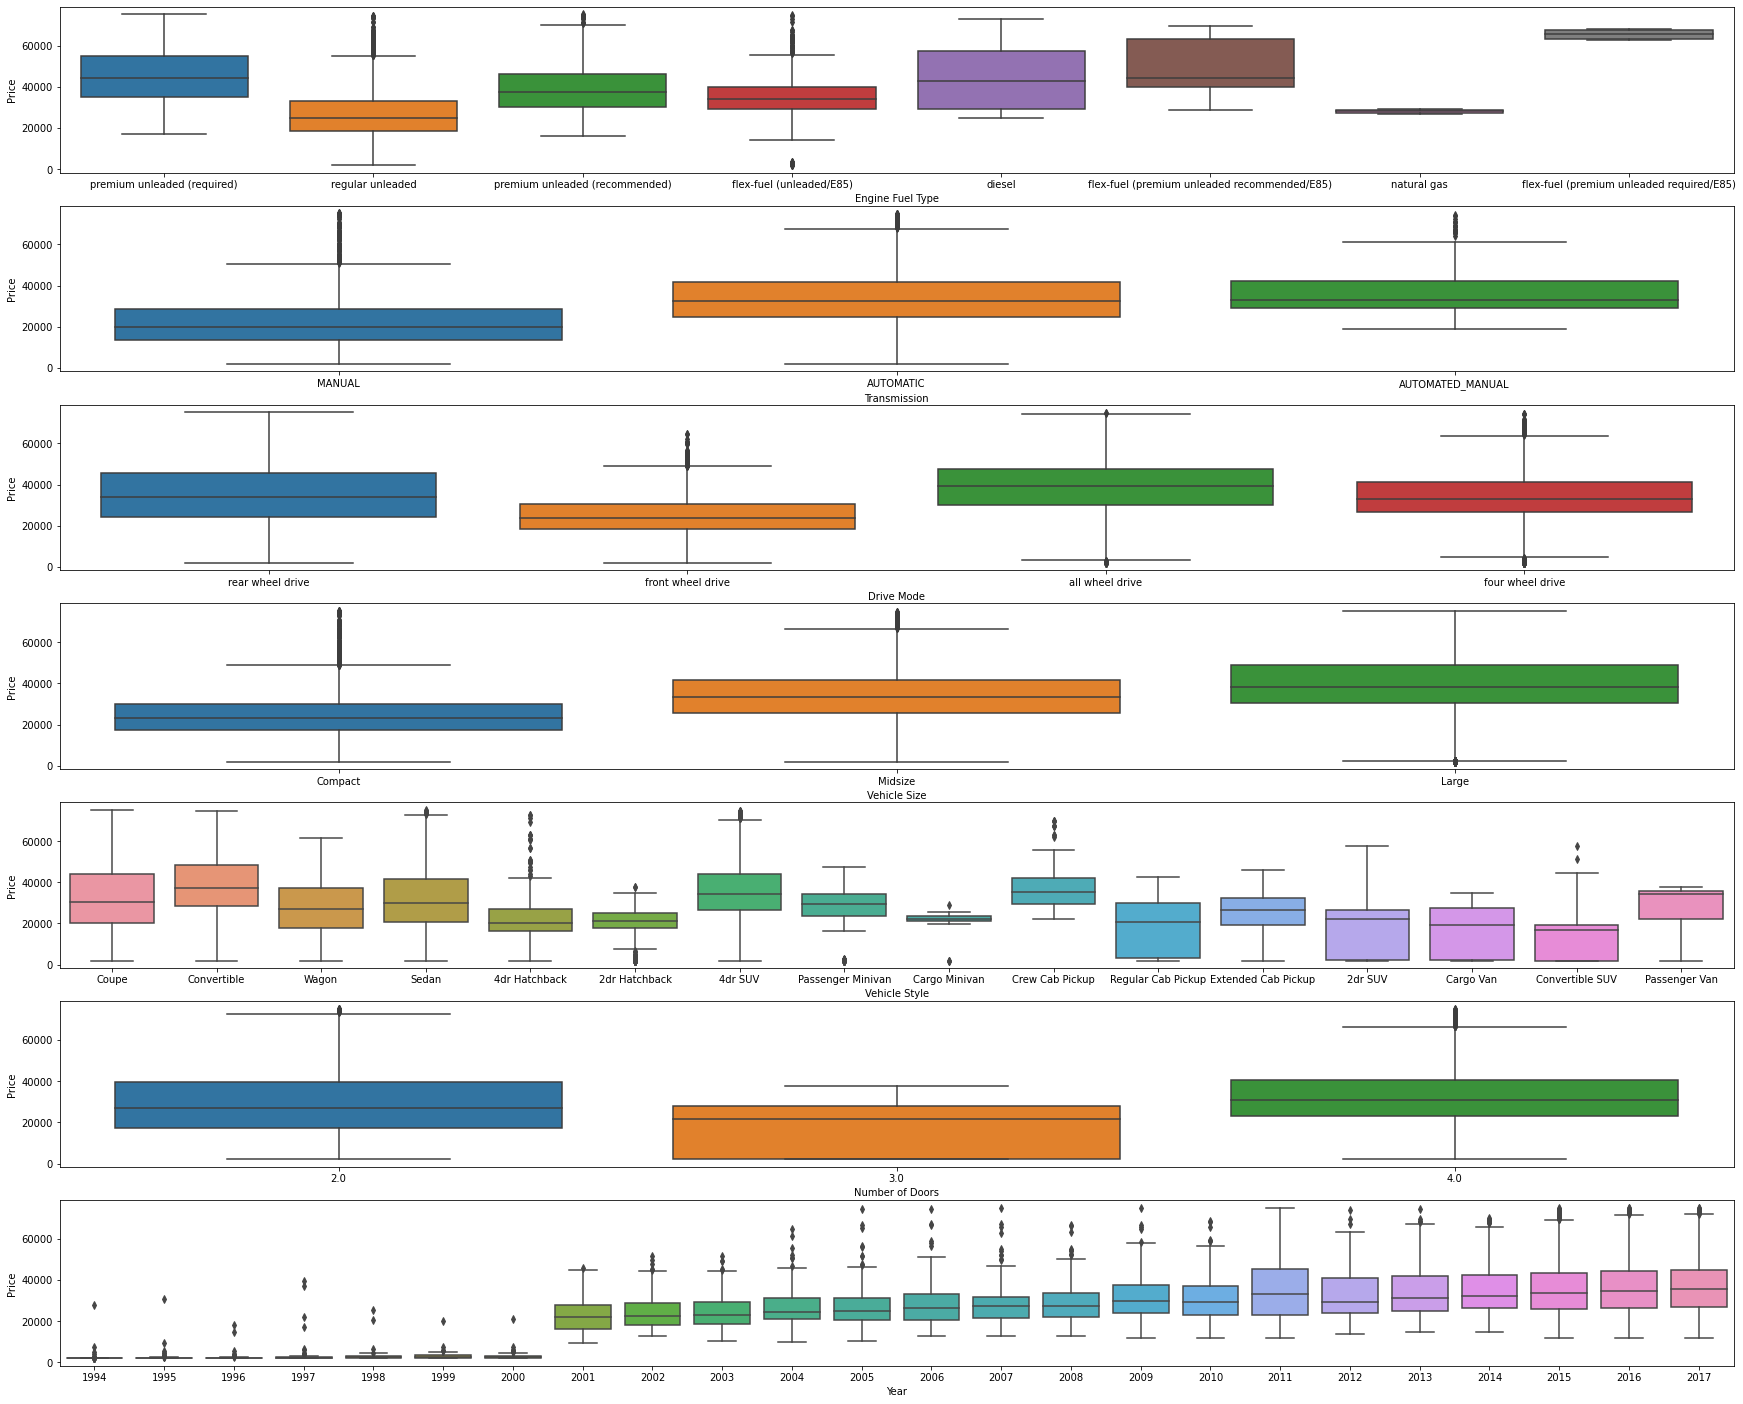

In [ ]:
plt.figure(figsize = (30,25))
plt.subplot(7,1,1)
sns.boxplot(x = data['Engine Fuel Type'], y = data['Price'])
plt.subplot(7,1,2)
sns.boxplot(x = data['Transmission'], y = data['Price'])
plt.subplot(7,1,3)
sns.boxplot(x = data['Drive Mode'], y = data['Price'])
plt.subplot(7,1,4)
sns.boxplot(x = data['Vehicle Size'], y = data['Price'])
plt.subplot(7,1,5)
sns.boxplot(x = data['Vehicle Style'], y = data['Price'])
plt.subplot(7,1,6)
sns.boxplot(x = data['Number of Doors'], y = data['Price'])
plt.subplot(7,1,7)
sns.boxplot(x = data['Year'], y = data['Price'])

1. The cars that use *'flex-fuel (premium unleaded required/E85)*' are the most expensive cars. All the other fuels do not make much influence on the price of the cars.

2. Automatic transmission vehicles are high-priced compared to manual transmission vehicles.

3. Among the drive modes, *front-wheel drive* cars prove to be the cheapest. The 4-wheel drive and rear-wheel drive cars have similar price influence.

4. Since price increases with  increase in the size of the cars, the *compact* segment cars are the cheapest. 

5. As the *cargo vans* and the *SUVs* prices look cheaper, the 4-wheel drive SUV make it to the premium segment in terms of price.

6. The *2-door* and *4-door* models have very little difference in their price range.

7. As age of car increases, the car price decreases.

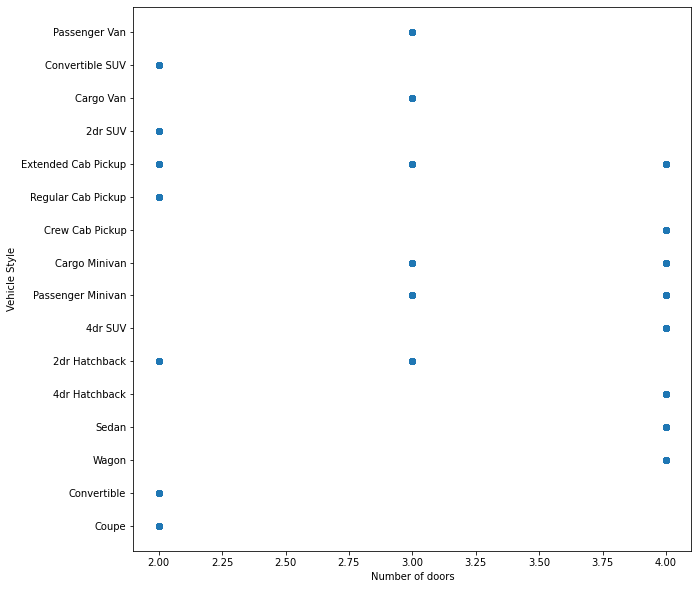

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(data['Number of Doors'], data['Vehicle Style'])
plt.xlabel('Number of doors')
plt.ylabel('Vehicle Style')
plt.show()

The 3-door models are mainly limited to the low cost cargo and pickup vans. 

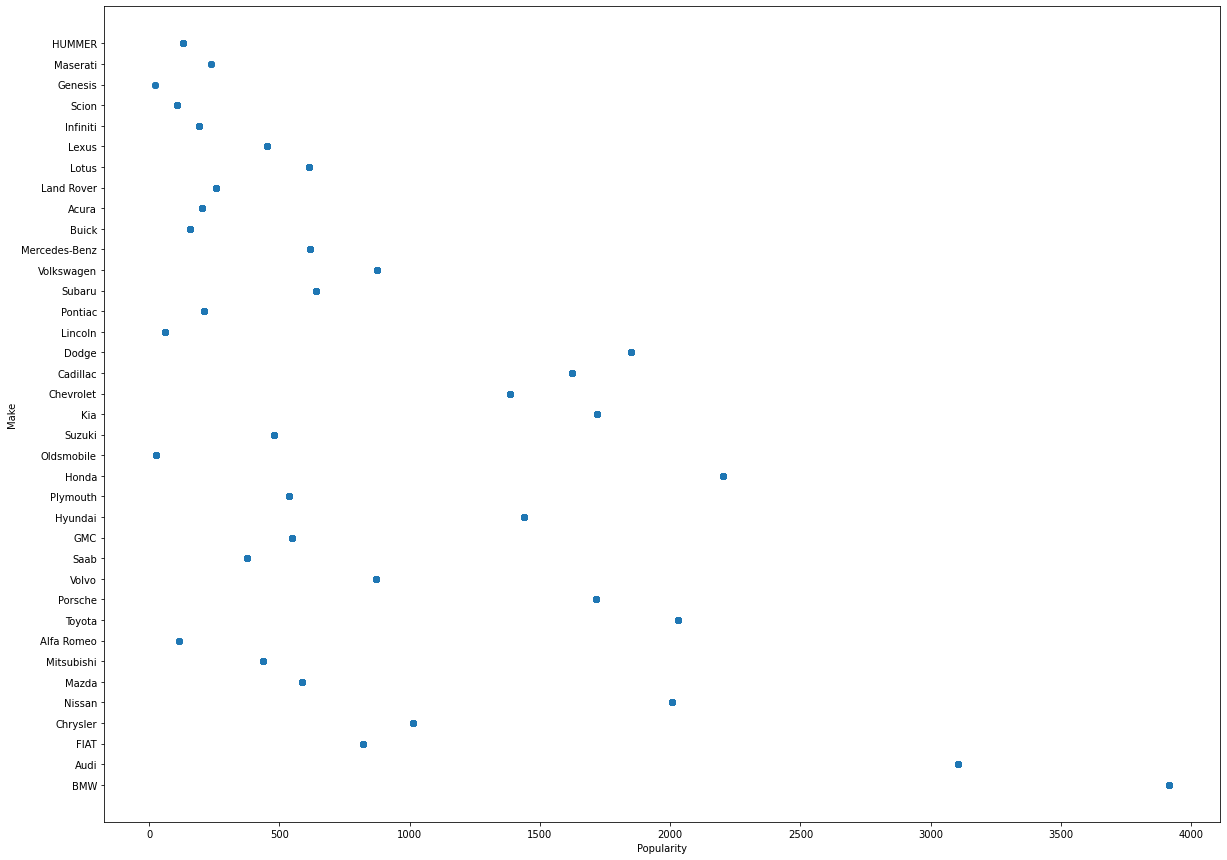

In [ ]:
plt.figure(figsize=(20,15))
plt.scatter(data['Popularity'], data['Make'])
plt.xlabel('Popularity')
plt.ylabel('Make')
plt.show()

BMW and Audi are the most popular car brands according to the available data.

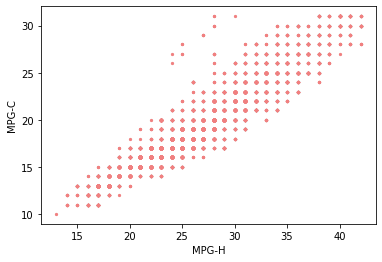

In [ ]:
plt.scatter(data['MPG-H'], data['MPG-C'], s=5, color='lightcoral')
plt.xlabel('MPG-H')
plt.ylabel('MPG-C')
plt.show()

The vehicles which give better MPG-C also give better MPG-H. The plot follows a linear trend as shown.

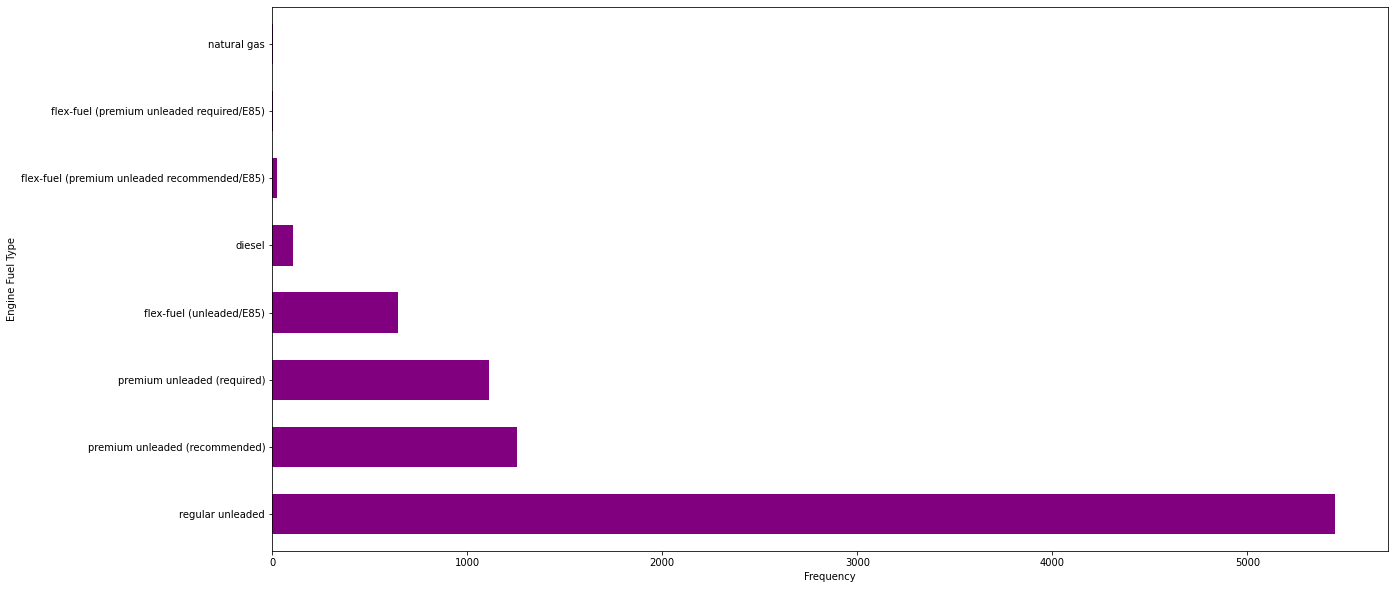

In [ ]:
freq=data['Engine Fuel Type'].value_counts().head(10)
freq.plot(kind='barh',color='purple',width=0.6,figsize=(20,10))
plt.xlabel('Frequency')
plt.ylabel('Engine Fuel Type')
plt.show()

The most used fuel is regular unleaded petrol among the others. Natural gas and flex-fuel (premium unleaded required/E85) are rarely used.

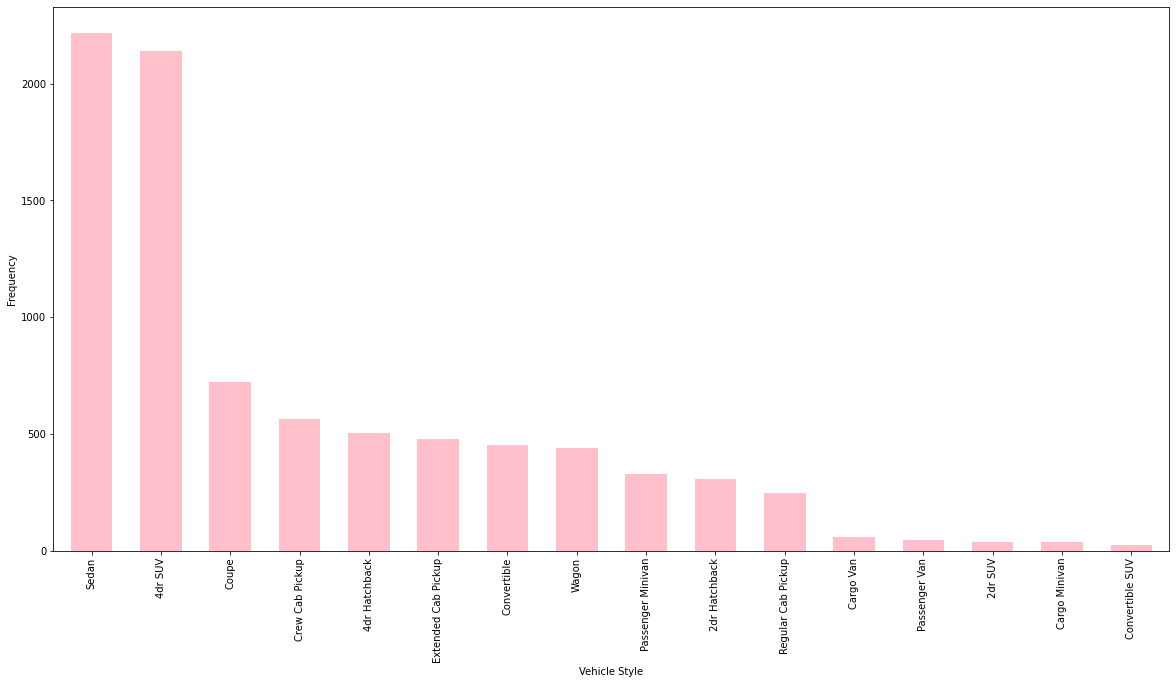

In [ ]:
freq=data['Vehicle Style'].value_counts()
freq.plot(kind='bar',color='pink',width=0.6,figsize=(20,10))
plt.xlabel('Vehicle Style')
plt.ylabel('Frequency')
plt.show()

The sedan and the 4 dr SUV are the most sold cars in the USA.




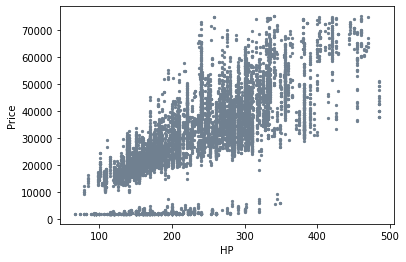

In [ ]:
plt.scatter(data['HP'], data['Price'], s=5, color='slategrey')
plt.xlabel('HP')
plt.ylabel('Price')
plt.show()

Clearly, the price of the car is proportional to the engine HP.

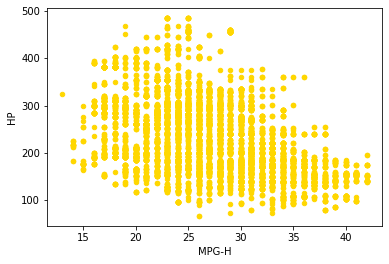

In [ ]:
plt.scatter(data['MPG-H'], data['HP'], s=20, color='gold')
plt.xlabel('MPG-H')
plt.ylabel('HP')
plt.show()

It can be concluded from the scatter plot that the mileage of higher engine capacity cars is lower compared to the lower engine capacity cars.

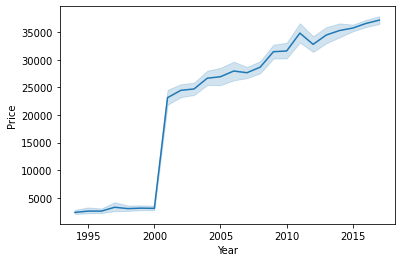

In [ ]:
sns.lineplot(y=data['Price'], x=data['Year'])

From the above plot, it can be inferred that only the cars made after the year 2000 have resale value.

In [ ]:
data['Vehicle Size'].value_counts()

Compact    3394
Midsize    3372
Large      1834
Name: Vehicle Size, dtype: int64

From the *Vehicle Size vs Price* boxplot, it can be seen that it is an ordinal variable i.e., it has a clear ordering. Hence, it can be converted to numerical data progressing from 1 to 3.

In [ ]:
data["Vehicle Size"].replace({"Compact": 1, "Midsize": 2, "Large": 3}, inplace=True)

Since automatic and automated manual cars have similar price ranges, it is easier to put them under a single category. 

In [ ]:
data["Transmission"].replace({"AUTOMATED_MANUAL": "AUTOMATIC"}, inplace=True)

# 9. Splitting the dataset into training and testing sets and building ML model

Dummy variables are “proxy” variables for categorical data in regression models.
These dummy variables will be created with *one hot encoding* and each attribute will have value either 0 or 1, representing presence or absence of that attribute.

In [ ]:
fuel = pd.get_dummies(data['Engine Fuel Type'])
data = pd.concat([data, fuel], axis = 1)

trans = pd.get_dummies(data['Transmission'])
data = pd.concat([data, trans], axis = 1)

mode = pd.get_dummies(data['Drive Mode'])
data = pd.concat([data, mode], axis = 1)

style = pd.get_dummies(data['Vehicle Style'])
data = pd.concat([data, style], axis = 1)

data.drop(['Engine Fuel Type', 'Transmission', 'Drive Mode', 'Vehicle Style'], axis = 1, inplace = True)

Attributes are the independent variables while labels are dependent variables whose values are to be predicted. We want to predict the '*Price*' depending upon the other variables. Therefore the label set will consist of the '*Price*' column which is stored in the y variable, and the attributes are stored in X variable.

In [ ]:
# dividing into X and Y sets for the model building

X = data.drop(columns=['Make', 'Model', 'Price', 'MPG-H', 'MPG-C'], axis = 1).values
y = data['Price'].values

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range.

StandardScaler re-scales a feature value such that its distribution is centred around 0, with a standard deviation of 1.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X) 
y = sc_y.fit_transform(y.reshape(-1,1)) 

In [ ]:
# splitting 80% of the data to the training set and 20% of the data to test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**MULTIPLE LINEAR REGRESSION**



Multiple linear regression is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of multiple linear regression is to model the linear relationship between the explanatory (independent) variables and response (dependent) variable.

In [ ]:
# importing LinearRegression class, instantiating it, and calling the fit() method along with training data to train the algorithm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

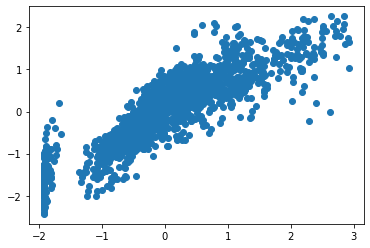

In [ ]:
# plotting prediction vs test data

y_pred = lin_model.predict(X_test)
plt.scatter(y_test,y_pred)

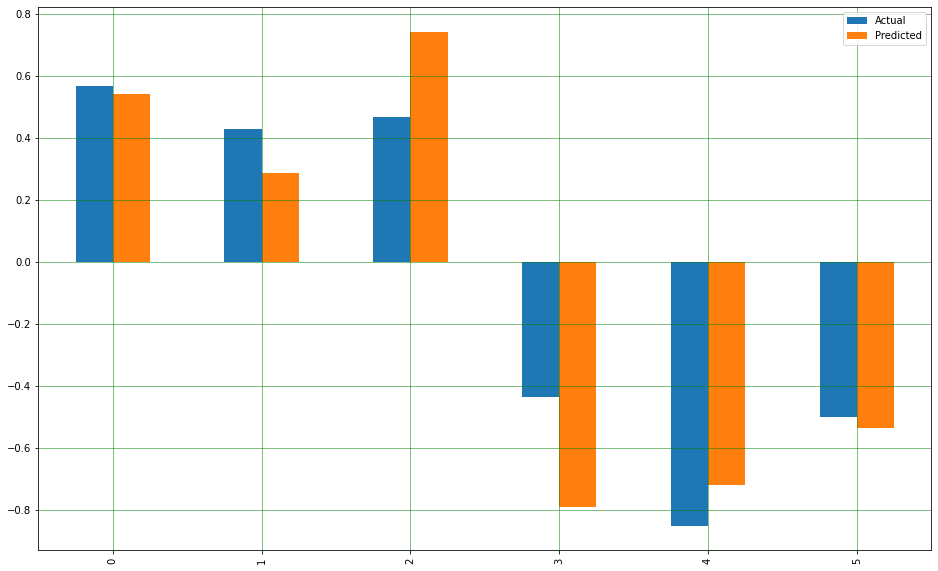

In [ ]:
# visualizing comparison result as a bar graph

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(6)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Although our model is not very precise, the predicted percentages are pretty close to the actual ones.

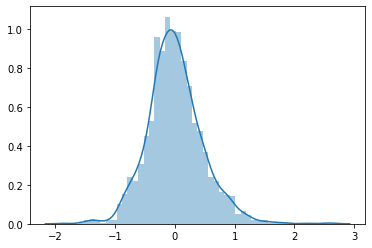

In [ ]:
# visualising the distribution 

sns.distplot((y_test-y_pred), bins=50)

The final step is to evaluate the performance of the algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

Mean Absolute Error (MAE) : the mean of the absolute value of the errors.

Root Mean Squared Error (RMSE) : the square root of the mean of the squared errors.

R-squared (R2) : how close the data are to the fitted regression line. .

In [ ]:
from sklearn import metrics
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 - score : ', metrics.r2_score(y_test,y_pred))

MAE :  0.35020093110050615
RMSE :  0.46552050317538685
R2 - score :  0.7744920707839442


# 10. Trying different algorithms

**SUPPORT VECTOR MACHINES**

Support Vector Machine is a discriminative algorithm that tries to find the optimal hyperplane that distinctly classifies the data points in N-dimensional space(N - the number of features). 

In [ ]:
# fitting SVR to the dataset

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

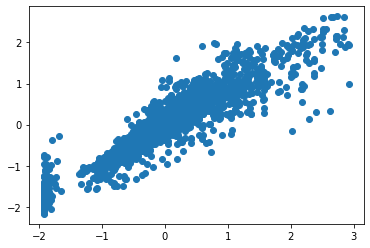

In [ ]:
# plotting prediction vs test data

y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

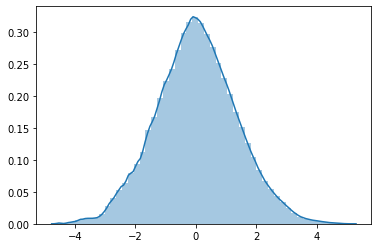

In [ ]:
# visualising the distribution 

sns.distplot((y_test-y_pred),bins=50)

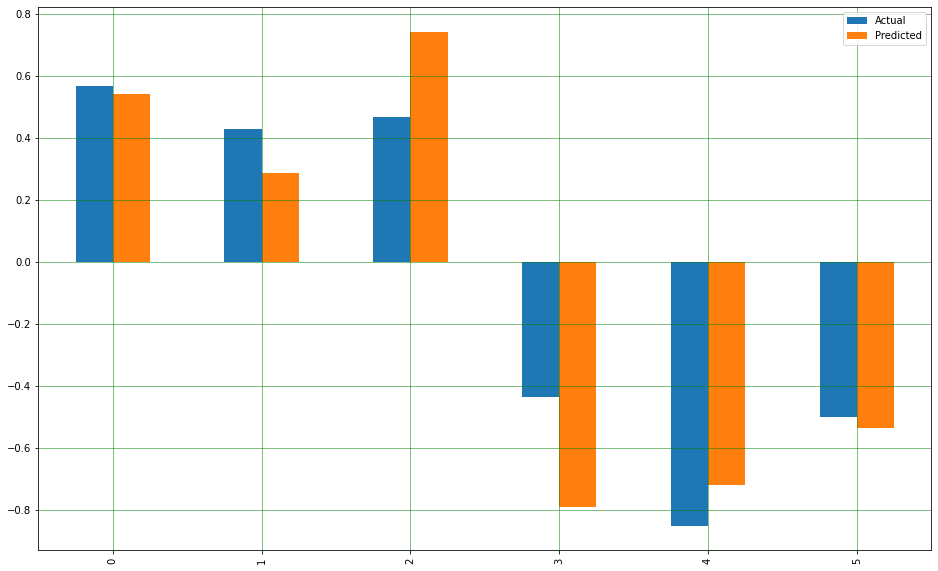

In [ ]:
# visualizing comparison result as a bar graph

df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df3 = df.head(6)
df3.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
# evaluating the performance of the algorithm

print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))  
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 - score : ', metrics.r2_score(y_test, y_pred))

MAE :  0.25796937021333116
RMSE :  0.3711734282932941
R2 - score :  0.8566367142053867


**RANDOM FOREST**

Random forest is a supervised learning algorithm. The "forest" it builds, is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

In [ ]:
# fitting random forest regression to the dataset

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

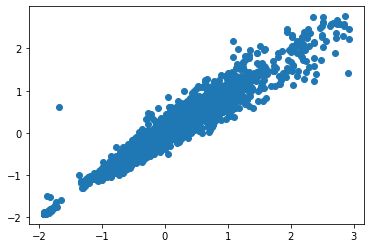

In [ ]:
# plotting prediction vs test data

y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

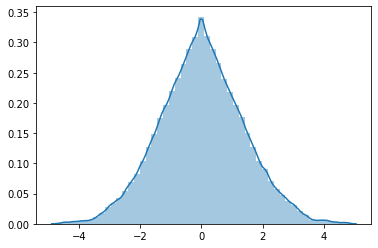

In [ ]:
# visualising the distribution 

sns.distplot((y_test-y_pred),bins=50)

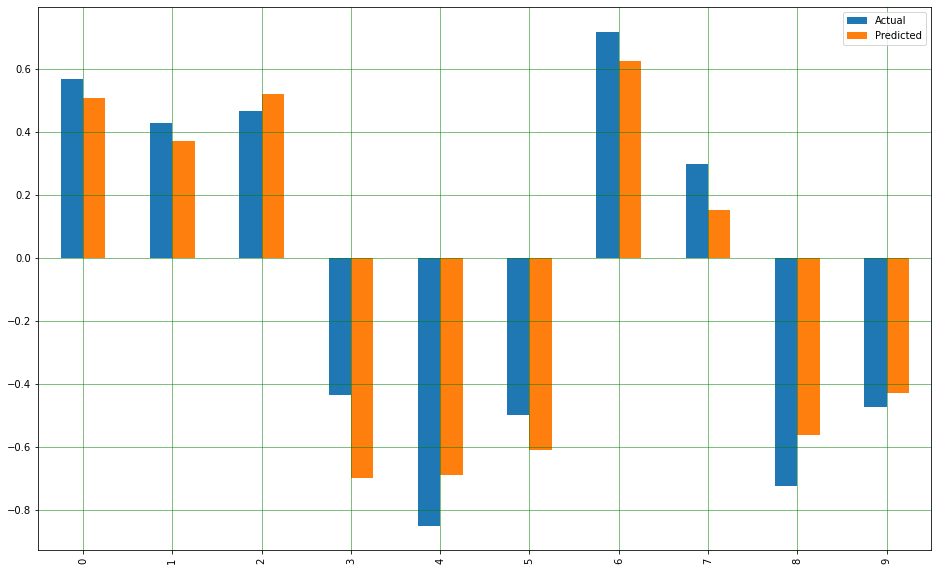

In [ ]:
# visualizing comparison result as a bar graph

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df1 = df.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
# evaluating the performance of the algorithm

print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))  
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 - score : ', metrics.r2_score(y_test, y_pred))

MAE :  0.16825626862008164
RMSE :  0.23925354635182242
R2 - score :  0.940433654325608


**POLYNOMIAL REGRESSION**

Polynomial Regression is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. 

In [ ]:
# dividing into X and Y sets for the model building

X = data[['Year', 'HP', 'Cylinders', 'Popularity', 'Vehicle Size', 'Number of Doors', 'MPG-H']].values
y = data['Price'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# fitting polynomial regression to the dataset  

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_model1 = LinearRegression()
lin_model1.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

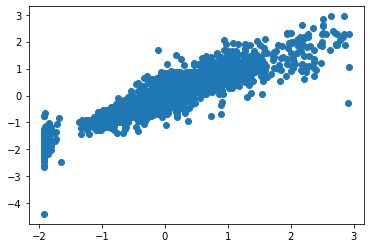

In [ ]:
# plotting prediction vs test data

y_pred=lin_model1.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)

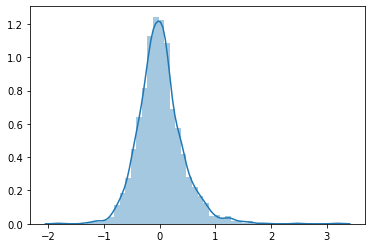

In [ ]:
# visualising the distribution

sns.distplot((y_test-y_pred),bins=50)

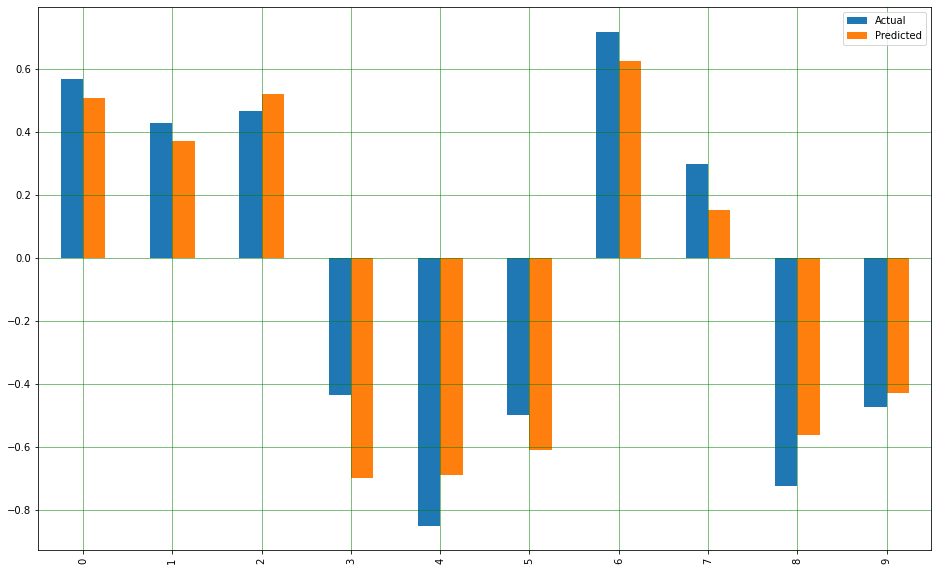

In [ ]:
# visualizing comparison result as a bar graph

df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df3 = df.head(10)
df3.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
# evaluating the performance of the algorithm

print('MAE : ', metrics.mean_absolute_error(y_test, y_pred))  
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2 score : ', metrics.r2_score(y_test, y_pred))

MAE :  0.29497648595517223
RMSE :  0.40341181033613327
R-2 score :  0.8306514795091426
